In [1]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=ed11589d68da07c85e7e75fdb8fca5b773805859905f32fb60075a0d6ba94ef7
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils import to_categorical
from joblib import dump, load

In [3]:
text = []
clas = []
df = pd.read_csv('labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [4]:
print(df.isnull().sum())
df['tweet'] = df['tweet'].apply(lambda x:x.lower())
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

tweet    0
class    0
dtype: int64


In [5]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

In [7]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)



In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:


y_train=to_categorical(y_train, num_classes = 3)
y_test=to_categorical(y_test, num_classes = 3)



In [10]:
model = Sequential()
model.add(Embedding(232337, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
310/310 [==============================] - 91s 272ms/step - loss: 0.4252 - accuracy: 0.7684 - val_loss: 0.4027 - val_accuracy: 0.7743
Epoch 2/25
310/310 [==============================] - 75s 241ms/step - loss: 0.4021 - accuracy: 0.7743 - val_loss: 0.4026 - val_accuracy: 0.7743
Epoch 3/25
310/310 [==============================] - 74s 238ms/step - loss: 0.4010 - accuracy: 0.7743 - val_loss: 0.4017 - val_accuracy: 0.7743
Epoch 4/25
310/310 [==============================] - 73s 235ms/step - loss: 0.4006 - accuracy: 0.7743 - val_loss: 0.4022 - val_accuracy: 0.7743
Epoch 5/25
310/310 [==============================] - 75s 242ms/step - loss: 0.4001 - accuracy: 0.7743 - val_loss: 0.4016 - val_accuracy: 0.7743
Epoch 6/25
310/310 [==============================] - 74s 237ms/step - loss: 0.3995 - accuracy: 0.7743 - val_loss: 0.4022 - val_accuracy: 0.7743
Epoch 7/25
310/310 [==============================] - 75s 242ms/step - loss: 0.3988 - accuracy: 0.7743 - val_loss: 0.4009 - val_ac

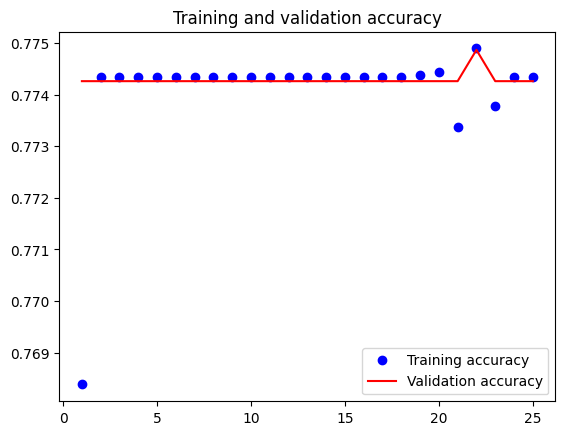

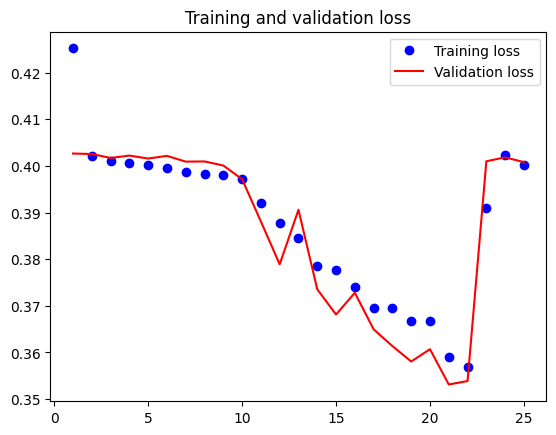

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.save('lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from wordcloud import WordCloud

In [13]:
# Predict and calculate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

155/155 [==============================] - 4s 21ms/step


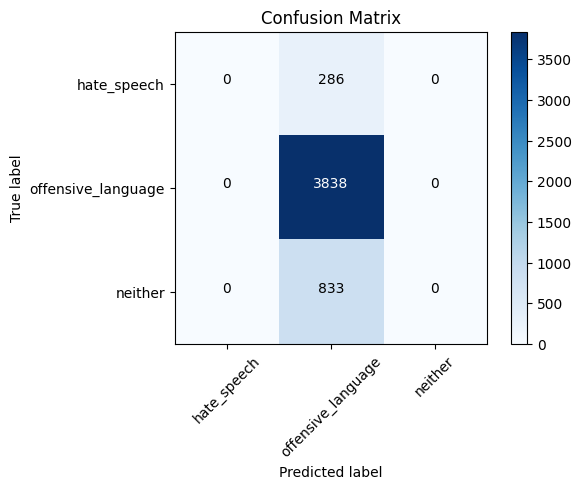

In [14]:
class_names = ['hate_speech', 'offensive_language', 'neither']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()

In [17]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])

# Step 1: Initial split into labeled and unlabeled sets
initial_labeled_ratio = 0.1
X_train_text, X_unlabeled_text, y_train, y_unlabeled = train_test_split(df['tweet'], df['class'], test_size=1-initial_labeled_ratio, stratify=df['class'], random_state=42)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')

X_unlabeled_seq = tokenizer.texts_to_sequences(X_unlabeled_text)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_unlabeled_cat = to_categorical(y_unlabeled, num_classes=3)


# Load the Keras model
from tensorflow.keras.models import load_model

model_path = '/content/lstm.h5'  # Adjust the path if needed
model = load_model(model_path)

model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)


# Step 4: Active learning loop
num_iterations = 10
samples_per_iteration = 100

for iteration in range(num_iterations):
    # Predict probabilities on the unlabeled data
    probs = model.predict(X_unlabeled_pad)
    uncertainties = 1 - np.max(probs, axis=1)  # Use uncertainty sampling

    # Select the most uncertain samples
    uncertain_indices = np.argsort(uncertainties)[-samples_per_iteration:]
    X_new_train = X_unlabeled_pad[uncertain_indices]
    y_new_train = y_unlabeled_cat[uncertain_indices]

    # Remove the selected samples from the unlabeled pool
    X_unlabeled_pad = np.delete(X_unlabeled_pad, uncertain_indices, axis=0)
    y_unlabeled = np.delete(y_unlabeled, uncertain_indices, axis=0)

    # Add the new samples to the training set
    X_train_pad = np.vstack((X_train_pad, X_new_train))
    y_train_cat = np.vstack((y_train_cat, y_new_train))

    # Retrain the model
    model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

    # Evaluate the model
    train_acc = model.evaluate(X_train_pad, y_train_cat, verbose=0)[1]
    print(f"Iteration {iteration + 1}/{num_iterations}, Training Accuracy: {train_acc:.4f}")

# Final evaluation on all data
X_all_pad = pad_sequences(tokenizer.texts_to_sequences(df['tweet']), maxlen=max_len, padding='post', truncating='post')
y_all = to_categorical(df['class'], num_classes=3)
final_loss, final_accuracy = model.evaluate(X_all_pad, y_all, verbose=0)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Save the final model
model.save('lstm_active_learning.h5')


Epoch 1/5
35/35 [==============================] - 18s 452ms/step - loss: 0.4042 - accuracy: 0.7744 - val_loss: 0.3971 - val_accuracy: 0.7742
Epoch 2/5
35/35 [==============================] - 14s 404ms/step - loss: 0.4036 - accuracy: 0.7744 - val_loss: 0.3973 - val_accuracy: 0.7742
Epoch 3/5
35/35 [==============================] - 13s 384ms/step - loss: 0.4041 - accuracy: 0.7744 - val_loss: 0.3970 - val_accuracy: 0.7742
Epoch 4/5
35/35 [==============================] - 12s 358ms/step - loss: 0.4036 - accuracy: 0.7744 - val_loss: 0.3971 - val_accuracy: 0.7742
Epoch 5/5
698/698 [==============================] - 22s 31ms/step
Epoch 1/5
37/37 [==============================] - 13s 352ms/step - loss: 0.4029 - accuracy: 0.7746 - val_loss: 0.3740 - val_accuracy: 0.7984
Epoch 2/5
37/37 [==============================] - 13s 345ms/step - loss: 0.4030 - accuracy: 0.7746 - val_loss: 0.3742 - val_accuracy: 0.7984
Epoch 3/5
37/37 [==============================] - 13s 341ms/step - loss: 0.4039 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
